In [98]:
# Import libraries
import pandas as pd
import numpy as np

In [99]:
# Import cleaned data (output from colaborator 3)
df = pd.read_csv('../data/03_processed/cleaned_dataframe.csv')
df.head()

,sex,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,BMI,age,cigsPerDay,glucose,sysBP,totChol,heartRate
0,1,0,0,0,0,0,0,0.277024,0.184211,0.000000,0.104520,0.106383,0.140652,0.363636
1,0,0,0,0,0,0,0,0.319680,0.368421,0.000000,0.101695,0.177305,0.234991,0.515152
2,1,1,0,0,0,0,0,0.237518,0.421053,0.285714,0.084746,0.208038,0.226415,0.313131
3,0,1,0,0,1,0,1,0.316045,0.763158,0.428571,0.177966,0.314421,0.192110,0.212121
4,0,1,0,0,0,0,0,0.183228,0.368421,0.328571,0.127119,0.219858,0.295026,0.414141


In [100]:
# Create a function to aggregate variables by grouping variable using pandas groupby. 

def aggregate_by_group(df, group_var, agg_dict):
    """
    Aggregate variables by a grouping column.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    group_var (str or list[str]): Variable/s (column/s) to group by
    agg_dict (dict): Dictionary of aggregations
                     e.g. {'heartRate': mean, 'visits': sum}

    Returns:
    pd.DataFrame: Aggregated DataFrame
    """
    df_agg = df.groupby(group_var)
    df_agg = df_agg.aggregate(agg_dict)
    df_agg = df_agg.reset_index()

    return df_agg

In [101]:
df.columns

Index(['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD', 'BMI', 'age', 'cigsPerDay', 'glucose',
       'sysBP', 'totChol', 'heartRate'],
      dtype='object')

In [103]:
# Aggregate variables

# Groupping variables:
group_var = ['sex', 'age', 'currentSmoker', 
             'BPMeds', 'prevalentStroke', 'prevalentHyp', 
             'diabetes', 'TenYearCHD']

# Aggregation function:
agg_dict = {
    "cigsPerDay": "mean",
    "totChol": "mean",
    "sysBP": "mean",
    "BMI": "mean",
    "heartRate": "mean",
    "glucose": "mean"
}

df_agg = aggregate_by_group(df, group_var, agg_dict)

In [105]:
# Export aggregated df (.csv)
df_agg.to_csv('../data/04_aggregated/aggregated_dataframe.csv', index=False)

In [107]:
df_agg.head()

,sex,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose
0,0,0.000000,1,0,0,0,0,0,0.214286,0.221269,0.130024,0.346583,0.363636,0.135593
1,0,0.026316,0,0,0,0,0,0,0.000000,0.077187,0.115839,0.104217,0.424242,0.081921
2,0,0.026316,1,0,0,0,0,0,0.142857,0.148370,0.160757,0.173655,0.313131,0.122881
3,0,0.052632,0,0,0,0,0,0,0.000000,0.140938,0.124507,0.193448,0.326599,0.112994
4,0,0.052632,1,0,0,0,0,0,0.265306,0.126930,0.122594,0.154283,0.305916,0.100484


In [ ]:
# Implement classification (e.g., KNN or othermodel) to distinguish patients vs. controls. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 1. Split X and Y:
y = df_agg['TenYearCHD'].astype(int)
X = df_agg.drop(['TenYearCHD'], axis=1) # drop all varribales that are not related to the analysis 

# 2. Classify (KNN)
knn = KNeighborsClassifier(n_neighbors=5) # Initialize the model with n = neighbors
knn.fit(X, y) ## Fit the model on the observed data.

# 3. Check model metrics:

## See how the model performs.
print ('The accuracy of the model is ' + str(knn.score(X, y)))

## Confusion matrix
y_pred = knn.predict(X)

cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:\n", cm)

## Metrics
precision = precision_score(y, y_pred)
sensitivity = recall_score(y, y_pred)   # also called recall or True Positive Rate
specificity = tn / (tn + fp)
f_score = f1_score(y, y_pred)

print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F-score:", f_score)

The accuracy of the model is 0.6971935007385525
Confusion Matrix:
 [[379  27]
 [178  93]]
Precision: 0.775
Sensitivity (Recall): 0.34317343173431736
Specificity: 0.9334975369458128
F-score: 0.47570332480818417


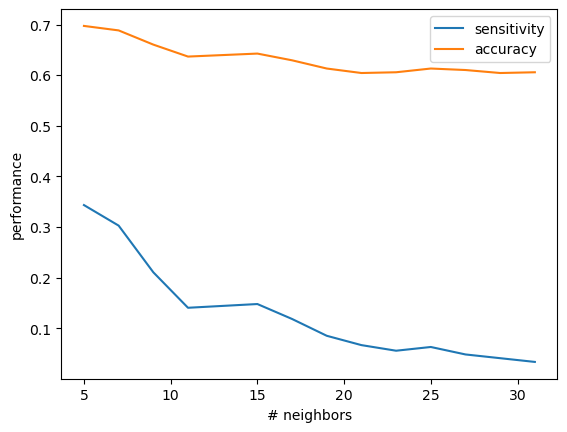

In [ ]:
import matplotlib.pyplot as plt

nn = list([5, 7, 9, 11, 15, 17, 19, 21, 23, 25, 27, 29, 31])
sen = list([])
acc =list([])
for i in nn:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    sen.append(recall_score(y, y_pred))
    acc.append(knn.score(X, y))
    
plt.plot(nn,sen) 
plt.plot(nn,acc)   
plt.xlabel('# neighbors')
plt.ylabel('performance')
plt.legend(['sensitivity','accuracy'])
plt.show()